# 簡介

## 加入類別不平衡處理，使用 BorderlineSMOTE

### 程式依序為：載入library、讀取訓練資料、檢查缺失值、檢查離群值、檢查異常值、分割X、Y、分割10份交叉驗證(K-Fold)與建模、計算交叉驗證結果的平均值。

## 載入lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB,ComplementNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn.base import clone
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import BorderlineSMOTE 

import seaborn as sns

# 讀取 訓練資料


In [2]:
df = pd.read_csv('train.csv')
df

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,3758,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,4437,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,7449,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,665,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


## miss values
## 統計缺失值

In [3]:
df.isna().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    1
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           1
Browser                    1
Region                     1
TrafficType                1
VisitorType                1
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
### 檢視缺失值資料
df[df.isna().any(axis=1)]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4316,7,6,999.000000,0,0.0,14,211.470238,0.001190,0.039521,0.0,0.0,8,NaN,10.0,1.0,5.0,2.0,0,0
5378,1,1,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.6,2,3.0,NaN,NaN,NaN,NaN,0,0
7838,5,7,245.333333,0,0.0,5,NaN,0.027273,0.051818,0.0,0.0,2,3.0,3.0,6.0,12.0,2.0,0,0


In [5]:
### 取出非缺失值資料
df1=df[df.notna().all(axis=1)]
df1

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,3758,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,4437,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,7449,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,665,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


In [6]:
### 刪除ID
df1=df1.drop(columns=['ID'])
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


# 檢查離群值（outlier）

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,8097.0,2.309003,3.311535e+00,0.0,0.000000,1.000000,4.000000,2.700000e+01
Administrative_Duration,8097.0,80.802419,1.798223e+02,0.0,0.000000,7.000000,91.888889,3.398750e+03
Informational,8097.0,0.498209,1.258284e+00,0.0,0.000000,0.000000,0.000000,2.400000e+01
Informational_Duration,8097.0,32.896484,1.352345e+02,0.0,0.000000,0.000000,0.000000,2.549375e+03
ProductRelated,8097.0,31.796468,4.496670e+01,0.0,7.000000,18.000000,38.000000,7.050000e+02
ProductRelated_Duration,8097.0,83135.989140,6.359881e+06,0.0,183.833333,599.000000,1462.450000,5.634924e+08
BounceRates,8097.0,0.020324,1.319578e-01,-11.0,0.000000,0.003200,0.016923,2.000000e-01
ExitRates,8097.0,0.042678,4.791996e-02,0.0,0.014286,0.025121,0.050000,2.000000e-01
PageValues,8097.0,5.746534,1.794355e+01,0.0,0.000000,0.000000,0.000000,2.879538e+02
SpecialDay,8097.0,0.060417,1.977529e-01,0.0,0.000000,0.000000,0.000000,1.000000e+00


In [8]:
# 找出前2筆 ，看似outlier
df1['ProductRelated_Duration'].sort_values(ascending=False).head(10)

408     5.634924e+08
3953    1.000000e+08
7397    6.397352e+04
2318    4.317123e+04
6998    2.484416e+04
2115    2.388881e+04
2363    2.334208e+04
7392    2.305010e+04
8079    2.185705e+04
4760    2.167224e+04
Name: ProductRelated_Duration, dtype: float64

# 檢查異常值

In [9]:
# 找出小於0的資料，比率小於0不合理
df1[df1['BounceRates']<0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
184,1,7.0,0,0.0,50,2330.727381,-1.0,0.031399,0.0,0.0,8,5.0,10.0,6.0,12.0,2.0,0,0
7147,0,0.0,1,1729.0,19,1401.083333,-11.0,0.050000,0.0,0.0,9,1.0,10.0,0.0,12.0,2.0,0,0


In [10]:
#  13月 不存在
df1['Month'].value_counts()

2     2202
8     1951
1     1265
9     1140
7      355
6      290
4      288
5      284
3      190
0      131
13       1
Name: Month, dtype: int64

In [11]:
# 標記是否存在100，不合理
df1['Weekend'].value_counts()

0      6145
1      1951
100       1
Name: Weekend, dtype: int64

In [12]:
df1[df1['Weekend']==100]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1666,0,0.0,0,0.0,22,2189.5,0.009524,0.028571,0.0,0.0,8,0.0,10.0,0.0,5.0,2.0,100,0


In [13]:
df2=df1.drop(index=[408,3953,184,7147,7714,1666])
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


In [14]:
# 標記轉型整數
df2.loc()[:,'OperatingSystems':'Revenue'] = df2.loc()[:,'OperatingSystems':'Revenue'].astype(int)
df2.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int32
Browser                      int32
Region                       int32
TrafficType                  int32
VisitorType                  int32
Weekend                      int32
Revenue                      int32
dtype: object

In [15]:
# 檢查敘述統計資料
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,8091.0,2.309974,3.312422,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,8091.0,80.816523,179.872842,0.0,0.000000,7.000000,91.861111,3398.750000
Informational,8091.0,0.498331,1.258677,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,8091.0,32.701005,133.961624,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,8091.0,31.802249,44.981306,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,8091.0,1193.079277,1952.936206,0.0,183.687500,598.783333,1461.145833,63973.522230
BounceRates,8091.0,0.021821,0.047777,0.0,0.000000,0.003215,0.016926,0.200000
ExitRates,8091.0,0.042690,0.047935,0.0,0.014286,0.025121,0.050000,0.200000
PageValues,8091.0,5.750796,17.949520,0.0,0.000000,0.000000,0.000000,287.953793
SpecialDay,8091.0,0.060462,0.197819,0.0,0.000000,0.000000,0.000000,1.000000


## 檢視 Revenue 比例(類別不平衡)

In [16]:
df2['Revenue'].value_counts()

0    6814
1    1277
Name: Revenue, dtype: int64

In [17]:
X= df2.loc()[:,:'Weekend']
Y= df2.loc()[:,'Revenue']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    stratify=Y,
                                                    random_state=0
                                                   )

# 加入類別不平衡處理，使用 BorderlineSMOTE

In [18]:
sm = BorderlineSMOTE(random_state=36,sampling_strategy='minority')
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [19]:
X_res

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,4,364.500000,0,0.0,27,955.525000,0.013333,0.022222,0.000000,0.0,8,5,10,6,8,2,1
1,2,172.000000,0,0.0,61,3374.916667,0.001111,0.021389,0.000000,0.0,2,1,10,5,8,2,0
2,0,0.000000,0,0.0,8,201.000000,0.000000,0.062500,0.000000,0.0,1,1,1,5,8,2,0
3,4,185.000000,0,0.0,40,1694.750000,0.020513,0.031197,0.000000,0.0,1,1,10,1,8,2,0
4,1,58.500000,0,0.0,23,1033.000000,0.008333,0.037500,0.000000,0.0,9,1,10,6,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,2,117.351434,0,0.0,24,1952.333201,0.005833,0.020942,39.414751,0.0,8,3,4,0,4,1,0
9534,7,426.170613,0,0.0,27,421.351210,0.003391,0.014222,13.703917,0.0,6,2,4,6,4,2,0
9535,4,80.680344,0,0.0,9,141.484649,0.012625,0.015320,0.000000,0.0,4,4,7,1,6,2,0
9536,2,38.631982,0,0.0,21,803.393784,0.003210,0.017051,17.850389,0.0,1,1,7,1,5,2,0


In [20]:
Y_res

0       0
1       0
2       0
3       0
4       0
       ..
9533    1
9534    1
9535    1
9536    1
9537    1
Name: Revenue, Length: 9538, dtype: int32

# 建模

In [23]:


model_dict={'RandomForest':RandomForestClassifier(random_state=0, verbose=0),
            'GradientBoosting':GradientBoostingClassifier(random_state=0, verbose=0),
            'ExtraTrees':ExtraTreesClassifier(n_jobs=8,random_state=0, verbose=0),
            'KNN':KNeighborsClassifier(),
            'SVM':SVC(probability=True),
            'ComplementNB':ComplementNB()
}


## 使用 10份 KFold 建立模型與計算績效

In [24]:
def model_score(Y_test, y_pred,model):
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    df_report1 = pd.DataFrame( 
        [[model,
          accuracy_score(Y_test, y_pred),
          precision_score(Y_test, y_pred),
          recall_score(Y_test, y_pred),
          (tn/(tn+fp)),
          f1_score(Y_test, y_pred),
          tn, fp, fn, tp
          ]])
    df_report1.columns = [
        'model',
        'accuracy',
        'precision',
        'recall/Sensitivity',
        'Specificity ',
        'f1_score',
        'tn', 'fp', 'fn', 'tp'
    ]
    return df_report1



kf = KFold(n_splits=10,random_state=0, shuffle=True)

model_score_list=[]
for key in model_dict.keys():
    
    print(f'{key} start')
    i=1
    for train_index, test_index in kf.split(X_res, Y_res): 
        temp=clone(model_dict[key])
        x_train, x_valid = X_res.iloc()[train_index,:], X_res.iloc()[test_index,:]
        y_train, y_valid = Y_res.iloc()[train_index], Y_res.iloc()[test_index]
        temp.fit(x_train,y_train)
        Y_pred = temp.predict(x_valid)
        model_score_temp = model_score(y_valid, Y_pred,key)
        model_score_temp['estimator'] = [temp]
        model_score_temp.index = [i]
        model_score_list.append(model_score_temp)
        i+=1
    print(f'{key} OK')


RandomForest start
RandomForest OK
GradientBoosting start
GradientBoosting OK
ExtraTrees start
ExtraTrees OK
KNN start
KNN OK
SVM start
SVM OK
ComplementNB start
ComplementNB OK


## 檢視 10份 KFold 模型績效


In [25]:
df_model_score=pd.concat(model_score_list)
df_model_score

,model,accuracy,precision,recall/Sensitivity,Specificity,f1_score,tn,fp,fn,tp,estimator
1,RandomForest,0.940252,0.939689,0.948919,0.930337,0.944282,414,31,26,483,"(DecisionTreeClassifier(max_features='auto', r..."
2,RandomForest,0.925577,0.901235,0.950108,0.902637,0.925026,445,48,23,438,"(DecisionTreeClassifier(max_features='auto', r..."
3,RandomForest,0.923480,0.904192,0.947699,0.899160,0.925434,428,48,25,453,"(DecisionTreeClassifier(max_features='auto', r..."
4,RandomForest,0.943396,0.930754,0.958071,0.928721,0.944215,443,34,20,457,"(DecisionTreeClassifier(max_features='auto', r..."
5,RandomForest,0.942348,0.910537,0.978632,0.907407,0.943357,441,45,10,458,"(DecisionTreeClassifier(max_features='auto', r..."
6,RandomForest,0.937107,0.914729,0.967213,0.905579,0.940239,422,44,16,472,"(DecisionTreeClassifier(max_features='auto', r..."
7,RandomForest,0.927673,0.906832,0.948052,0.908537,0.926984,447,45,24,438,"(DecisionTreeClassifier(max_features='auto', r..."
8,RandomForest,0.958071,0.952282,0.964286,0.951883,0.958246,455,23,17,459,"(DecisionTreeClassifier(max_features='auto', r..."
9,RandomForest,0.932844,0.926078,0.941545,0.924051,0.933747,438,36,28,451,"(DecisionTreeClassifier(max_features='auto', r..."
10,RandomForest,0.930745,0.910751,0.953291,0.908714,0.931535,438,44,22,449,"(DecisionTreeClassifier(max_features='auto', r..."


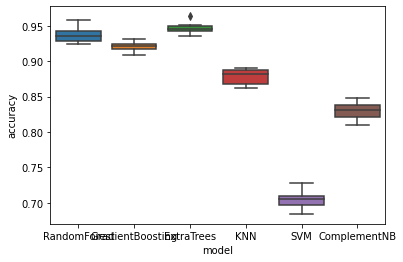

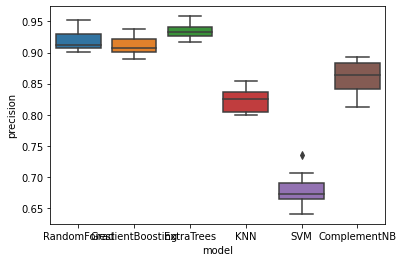

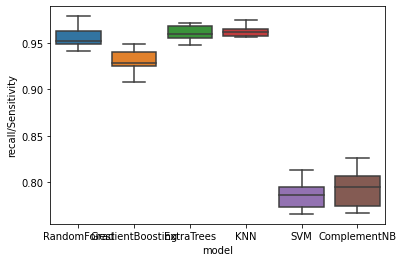

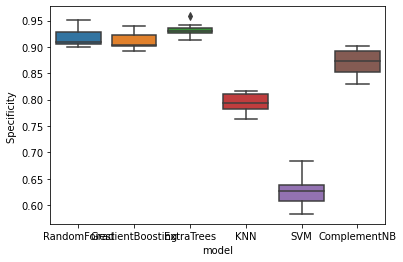

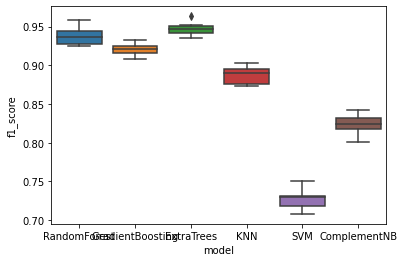

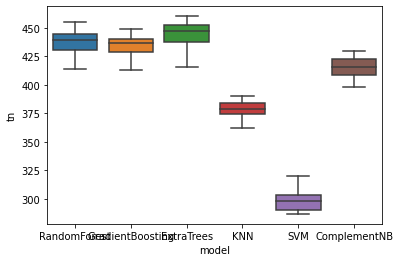

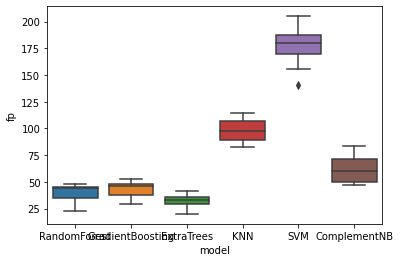

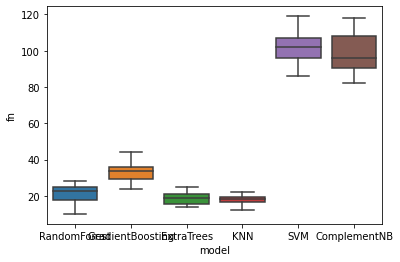

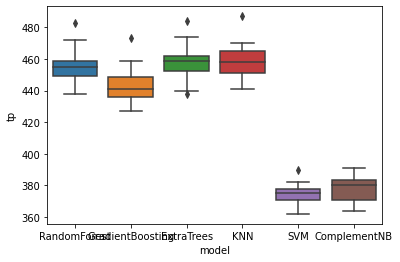

In [26]:
for col in df_model_score.columns[1:-1]:
    sns.boxplot(x="model", y=col, data=df_model_score)
    plt.show()

## 針對同一類型的分類器(10個分類器)的績效取平均

In [27]:
df_model_score_mean=df_model_score.groupby('model').mean()
df_model_score_mean

,accuracy,precision,recall/Sensitivity,Specificity,f1_score,tn,fp,fn,tp
model,,,,,,,,,
ComplementNB,0.830994,0.859117,0.792922,0.869814,0.824228,414.6,62.3,98.9,378.0
ExtraTrees,0.946320,0.933771,0.960786,0.931907,0.947035,444.4,32.5,18.7,458.2
GradientBoosting,0.920633,0.912466,0.930608,0.910869,0.921309,434.3,42.6,33.1,443.8
KNN,0.877961,0.823195,0.962691,0.793576,0.887369,378.3,98.6,17.8,459.1
RandomForest,0.936149,0.919708,0.955782,0.916703,0.937307,437.1,39.8,21.1,455.8
SVM,0.705809,0.677966,0.786375,0.626193,0.727677,298.3,178.6,102.0,374.9


## 檢驗資料使用有無重疊

In [28]:
(df_model_score.loc()[:,['model','tn','fp','fn','tp']].groupby('model').sum()).sum(axis=1)

model
ComplementNB        9538
ExtraTrees          9538
GradientBoosting    9538
KNN                 9538
RandomForest        9538
SVM                 9538
dtype: int64

## 以下為使用10個分類器檢視訓練結果
### 將計算所有模型的預測結果，並按照model分類後取眾數為分類結果。

In [29]:
df_predict = pd.DataFrame()
for model_str in  df_model_score_mean.index:
    print(model_str)
    for i in range(1,11):
        temp   = df_model_score[df_model_score['model']==model_str]['estimator'][i].predict(X_test)
        df_temp = pd.DataFrame(temp)
        y_pred = df_temp.mode(1)[0]
        df_predict[model_str]=y_pred

ComplementNB
ExtraTrees
GradientBoosting
KNN
RandomForest
SVM


In [30]:
df_predict['label']=Y_test.to_numpy()
df_predict

,ComplementNB,ExtraTrees,GradientBoosting,KNN,RandomForest,SVM,label
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2423,0,0,0,0,0,1,0
2424,0,0,0,1,0,1,0
2425,0,0,0,0,0,0,0
2426,0,0,0,0,0,0,0


In [31]:
model_score_list=[]
for model_str in  df_model_score_mean.index:
    model_score_list.append(model_score(df_predict['label'], df_predict[model_str],model_str))

In [32]:
pd.concat(model_score_list)

,model,accuracy,precision,recall/Sensitivity,Specificity,f1_score,tn,fp,fn,tp
0,ComplementNB,0.841433,0.498201,0.723238,0.863570,0.589989,1766,279,106,277
0,ExtraTrees,0.874382,0.593301,0.647520,0.916870,0.619226,1875,170,135,248
0,GradientBoosting,0.876442,0.582505,0.765013,0.897311,0.661400,1835,210,90,293
0,KNN,0.743410,0.327586,0.595300,0.771149,0.422614,1577,468,155,228
0,RandomForest,0.882208,0.602105,0.746736,0.907579,0.666667,1856,189,97,286
0,SVM,0.636738,0.255632,0.681462,0.628362,0.371795,1285,760,122,261


 ## 確認 tn	fp	fn	tp 總數為 Y_test總數

In [33]:
Y_test.value_counts()

0    2045
1     383
Name: Revenue, dtype: int64

# 保存模型
## 保存 RandomForest ，f1_score 最高

In [34]:
import joblib
joblib.dump(df_model_score[df_model_score['model']=='RandomForest']['estimator'], 'Q1-Kf-im-train_test')

['Q1-Kf-im-train_test']

# 使用 test.csv
## 預測結果

In [35]:
df_test = pd.read_csv('test.csv')
df_test

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,8,3,10,0,5,2,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,9,1,10,0,4,1,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,8,3,3,2,4,2,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,2,1,10,1,7,2,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,1,5,10,0,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5887,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,2,1,10,3,14,2,0
896,5273,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,8,1,10,0,4,2,0
897,5833,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,2,3,3,0,12,2,0
898,2119,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,8,3,3,6,5,2,1


In [36]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,900.0,4491.621111,2571.975086,3.0,2339.000000,4460.500000,6634.250000,8978.000000
Administrative,900.0,2.420000,3.271415,0.0,0.000000,1.000000,4.000000,18.000000
Administrative_Duration,900.0,79.843749,154.968236,0.0,0.000000,17.100000,96.187500,1715.000000
Informational,900.0,0.537778,1.323071,0.0,0.000000,0.000000,0.000000,16.000000
Informational_Duration,900.0,33.816267,123.149610,0.0,0.000000,0.000000,0.000000,1312.400000
ProductRelated,900.0,33.022222,43.370427,0.0,8.000000,18.000000,41.000000,337.000000
ProductRelated_Duration,900.0,1225.327672,1725.710370,0.0,188.400000,622.583333,1569.468750,14577.084980
BounceRates,900.0,0.021056,0.047337,0.0,0.000000,0.002674,0.015385,0.200000
ExitRates,900.0,0.041494,0.047904,0.0,0.013071,0.023856,0.046667,0.200000
PageValues,900.0,6.990629,20.153000,0.0,0.000000,0.000000,0.000000,167.230834


In [37]:
df_test1 = df_test.drop(columns=['ID'])
df_test1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,8,3,10,0,5,2,0
1,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,9,1,10,0,4,1,0
2,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,8,3,3,2,4,2,0
3,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,2,1,10,1,7,2,0
4,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,1,5,10,0,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,2,1,10,3,14,2,0
896,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,8,1,10,0,4,2,0
897,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,2,3,3,0,12,2,0
898,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,8,3,3,6,5,2,1


## 讀取最佳模型(RandomForest)

In [38]:
models = joblib.load('Q1-Kf-im-train_test')
models

1     (DecisionTreeClassifier(max_features='auto', r...
2     (DecisionTreeClassifier(max_features='auto', r...
3     (DecisionTreeClassifier(max_features='auto', r...
4     (DecisionTreeClassifier(max_features='auto', r...
5     (DecisionTreeClassifier(max_features='auto', r...
6     (DecisionTreeClassifier(max_features='auto', r...
7     (DecisionTreeClassifier(max_features='auto', r...
8     (DecisionTreeClassifier(max_features='auto', r...
9     (DecisionTreeClassifier(max_features='auto', r...
10    (DecisionTreeClassifier(max_features='auto', r...
Name: estimator, dtype: object

## 檢查欄位順序

In [39]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [40]:
df_test1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

## 預測 test.csv
### 10 個 RandomForest 預測機率，取平均

In [41]:
df_test_predict = pd.DataFrame()
for i in models.index:
    y_pred_proba = models[i].predict_proba(df_test1)
    df_test_predict[i]=y_pred_proba[:,1]
df_test_predict

,1,2,3,4,5,6,7,8,9,10
0,0.02,0.04,0.02,0.02,0.01,0.05,0.01,0.05,0.01,0.01
1,0.03,0.00,0.03,0.02,0.03,0.03,0.04,0.01,0.06,0.01
2,0.81,0.83,0.76,0.81,0.84,0.77,0.83,0.83,0.86,0.86
3,0.06,0.13,0.06,0.06,0.04,0.11,0.02,0.05,0.04,0.04
4,0.01,0.04,0.02,0.06,0.01,0.02,0.03,0.01,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...
895,0.05,0.08,0.03,0.07,0.06,0.06,0.03,0.05,0.02,0.04
896,0.26,0.15,0.13,0.20,0.16,0.16,0.27,0.16,0.20,0.19
897,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
898,0.00,0.03,0.04,0.00,0.03,0.00,0.04,0.00,0.00,0.03


In [42]:
df_out = df_test_predict.mean(axis=1)
df_out = df_out.to_frame()
df_out.columns=['HasRevenue']
df_out.insert(0,'ID',range(1,df_test_predict.shape[0]+1))
df_out

,ID,HasRevenue
0,1,0.024
1,2,0.026
2,3,0.820
3,4,0.061
4,5,0.024
...,...,...
895,896,0.049
896,897,0.188
897,898,0.000
898,899,0.017


## 輸出結果

In [43]:
df_out.to_csv('submission.csv',index=0,encoding="utf_8_sig")